In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression



from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score



from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold

import warnings
warnings.filterwarnings("ignore")

from sqlalchemy import Table, Column, Float, Integer, BigInteger

df=pd.read_csv('heart.csv')
df.head()
df.shape

(303, 14)

In [4]:
df.isnull().sum()
df.info


<bound method DataFrame.info of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  ou

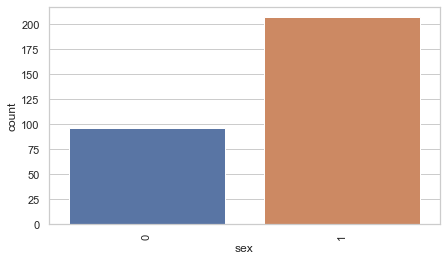

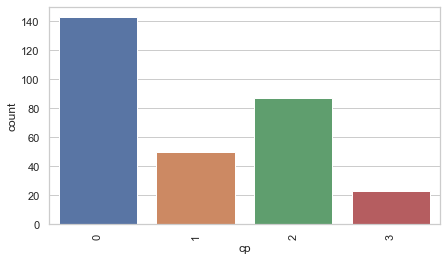

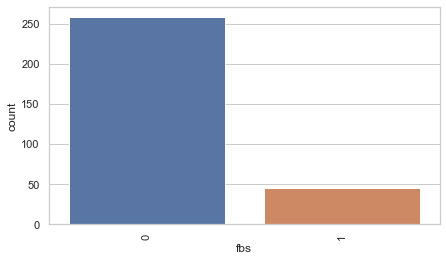

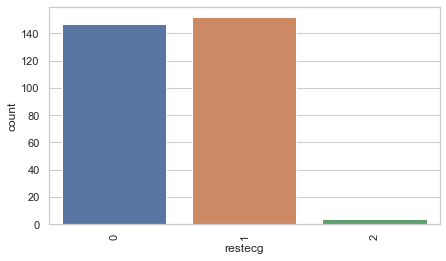

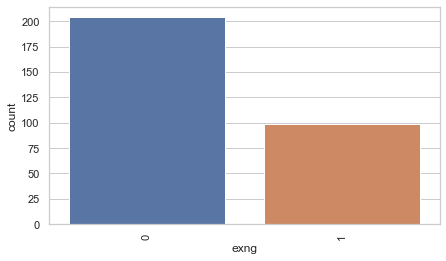

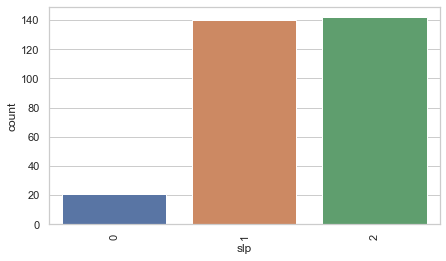

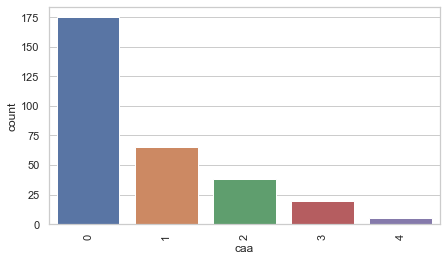

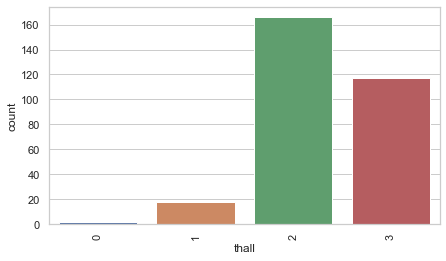

In [5]:
cat_features = ['sex','cp','fbs','restecg', 'exng', 'slp', 'caa','thall']
cont_features = ['age','trtbps','chol','thalachh']

for feature in cat_features:
    plt.figure(figsize=(7,4))
    sns.set_theme(style="whitegrid")
    ax = sns.countplot(df[feature])
    plt.xticks(rotation=90)
    plt.show()

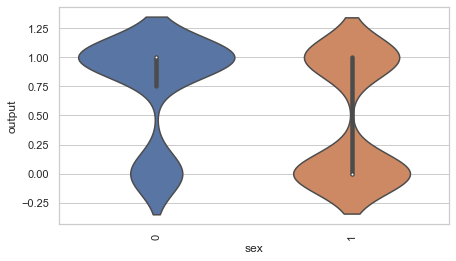

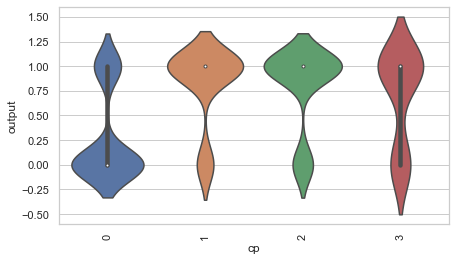

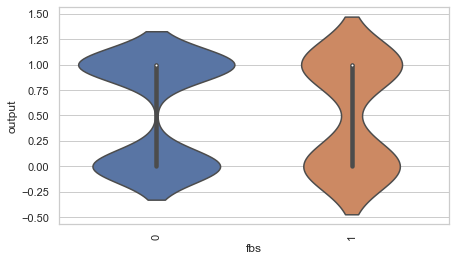

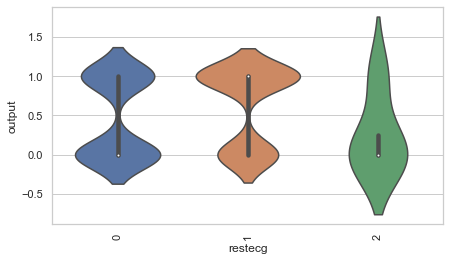

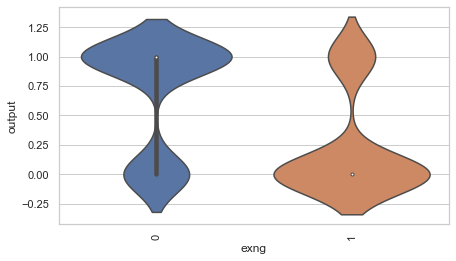

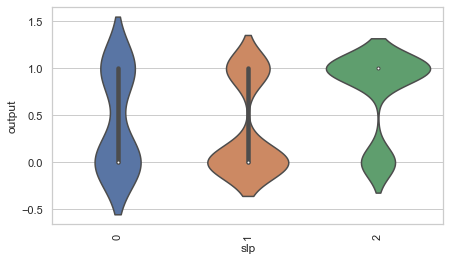

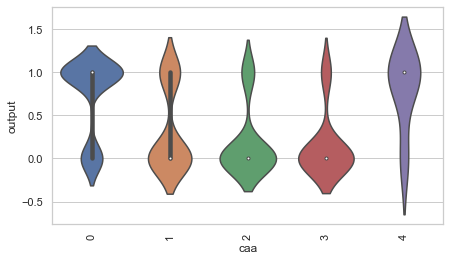

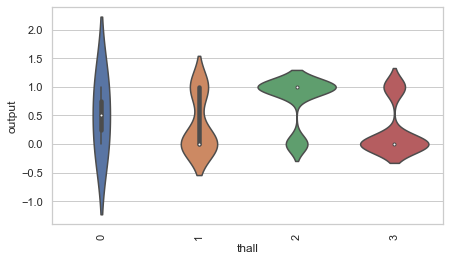

In [6]:
for feature in cat_features:
    plt.figure(figsize=(7,4))
    sns.set_theme(style="whitegrid")
    ax = sns.violinplot(x=feature,y='output',data=df)
    plt.xticks(rotation=90)
    plt.show()

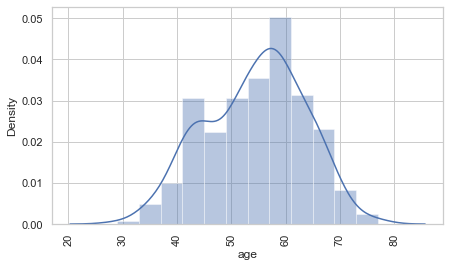

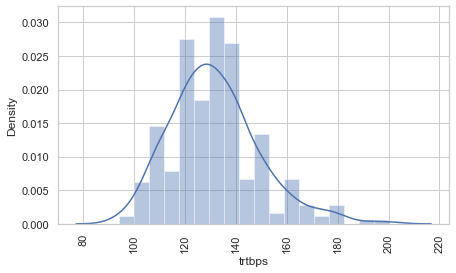

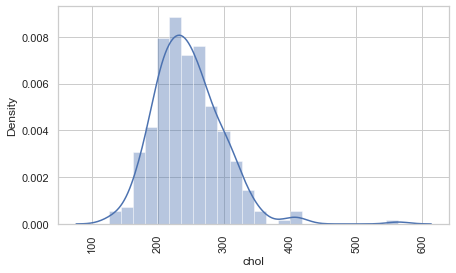

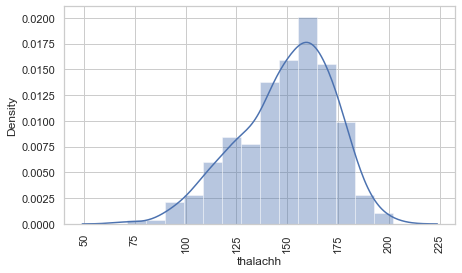

In [7]:
for feature in cont_features:
    plt.figure(figsize=(7,4))
    sns.set_theme(style="whitegrid")
    ax = sns.distplot(df[feature])
    plt.xticks(rotation=90)
    plt.show()

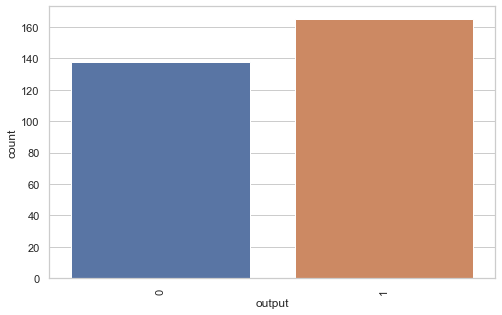

In [8]:
plt.figure(figsize=(8,5))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x='output', data=df)
plt.xticks(rotation=90)
plt.show()

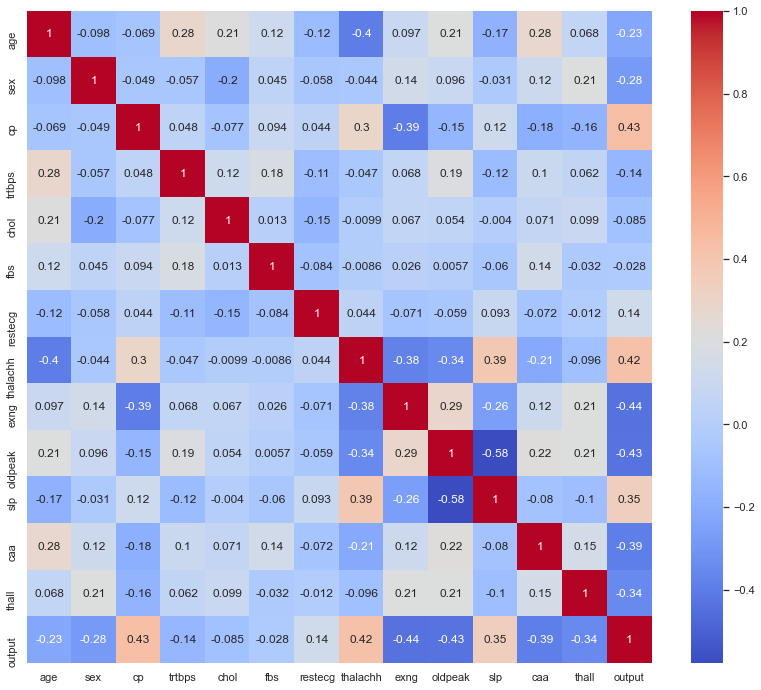

In [9]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [10]:
y = df['output']
X = df.drop('output', axis=1)
X.shape, y.shape

((303, 13), (303,))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24, test_size=0.2)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(242, 13) (242,)
(61, 13) (61,)


In [12]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)

In [13]:
pc = PCA(n_components=len(X.columns))
X_train_pc=pc.fit_transform(X_train_sc)
PC_df_train=pd.DataFrame(X_train_pc,columns=['PC_' +str(i) for i in range(1,pc.n_components_+1)])
PC_df_train


,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13
0,0.534592,1.292440,-1.226177,1.595222,0.733677,0.263681,-1.581171,-0.277824,-1.007107,-1.205663,0.269856,-0.130870,-0.329351
1,-1.937894,-1.193657,-0.198129,-1.287730,0.126354,1.011945,-0.915278,-0.563277,0.852074,-0.105422,-0.545219,0.225360,-0.141479
2,2.069825,1.818310,1.609428,-0.440846,0.937890,-0.441149,2.852977,-1.263357,0.995575,-0.773034,0.331601,0.993346,0.681295
3,-1.286428,0.940146,-0.050671,-0.086243,1.435308,-1.317269,-0.026002,-1.394505,1.203664,-0.090407,0.686906,0.976802,0.246218
4,0.288921,-0.599876,0.853489,0.352164,-1.024616,-0.205447,-1.859540,0.481358,-0.087035,-0.981784,0.046678,0.915086,-0.476234
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,1.611955,1.144282,-0.118558,-0.297967,-0.837479,-0.955661,-0.551777,-1.142490,1.602053,-1.093026,-0.288626,0.205673,-0.448389
238,-2.135667,1.140580,-1.170439,-0.255432,-0.183336,0.202119,-0.878891,0.438163,-0.208325,-0.968565,0.697744,0.297955,-0.390514
239,0.900530,1.591464,-1.873057,-1.036065,1.385857,0.188568,-0.632473,-0.237998,-1.226474,-0.155328,1.446045,0.459668,-0.217211
240,-0.317825,1.536287,0.157258,-0.459979,0.237746,-0.032097,-0.845569,-1.474567,-1.521602,1.072110,-0.778743,0.118419,0.081585


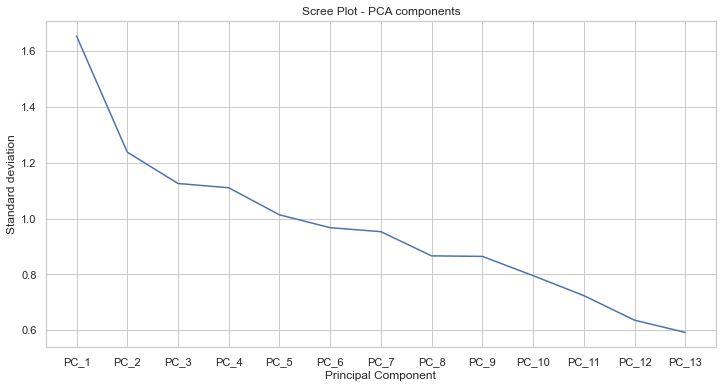

In [14]:
plt.figure(figsize=(12,6))
plt.plot(PC_df_train.std())
plt.title('Scree Plot - PCA components')
plt.xlabel('Principal Component')
plt.ylabel('Standard deviation')
plt.show()

In [15]:
print(PC_df_train.shape)
y_train.shape

(242, 13)


(242,)

In [16]:
classifier = LogisticRegression()
classifier.fit(pc.fit_transform(X_train_sc),y_train)
X_test_sc = sc.transform(X_test)
X_test_pc = pc.transform(X_test_sc)
y_lr=classifier.predict(X_test_pc)
print('Confusion Matrix \n',confusion_matrix(y_lr,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_lr,y_test))
print()
print('Classification Report \n',classification_report(y_lr,y_test))

Confusion Matrix 
 [[22  2]
 [ 7 30]]

Accuracy Score 
 0.8524590163934426

Classification Report 
               precision    recall  f1-score   support

           0       0.76      0.92      0.83        24
           1       0.94      0.81      0.87        37

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61



In [17]:
classifier = SVC()
classifier.fit(pc.fit_transform(X_train_sc),y_train)
X_test_sc = sc.transform(X_test)
X_test_pc = pc.transform(X_test_sc)
y_svc=classifier.predict(X_test_pc)
print('Confusion Matrix \n',confusion_matrix(y_svc,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_svc,y_test))
print()
print('Classification Report \n',classification_report(y_svc,y_test))

Confusion Matrix 
 [[22  3]
 [ 7 29]]

Accuracy Score 
 0.8360655737704918

Classification Report 
               precision    recall  f1-score   support

           0       0.76      0.88      0.81        25
           1       0.91      0.81      0.85        36

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.85      0.84      0.84        61



In [18]:
classifier = GaussianNB()
classifier.fit(pc.fit_transform(X_train_sc),y_train)
X_test_sc = sc.transform(X_test)
X_test_pc = pc.transform(X_test_sc)
y_gb=classifier.predict(X_test_pc)
print('Confusion Matrix \n',confusion_matrix(y_gb,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_gb,y_test))
print()
print('Classification Report \n',classification_report(y_gb,y_test))

Confusion Matrix 
 [[24  1]
 [ 5 31]]

Accuracy Score 
 0.9016393442622951

Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89        25
           1       0.97      0.86      0.91        36

    accuracy                           0.90        61
   macro avg       0.90      0.91      0.90        61
weighted avg       0.91      0.90      0.90        61



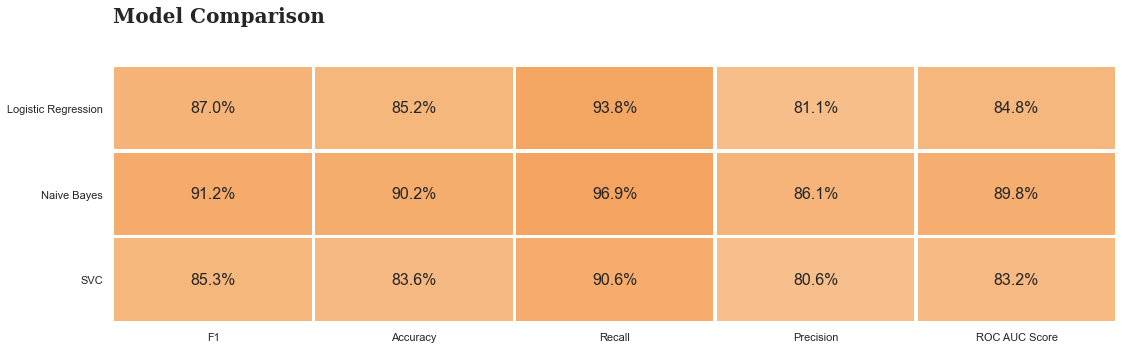

In [19]:
lr_df = pd.DataFrame(data=[f1_score(y_test,y_lr),accuracy_score(y_test, y_lr), recall_score(y_test, y_lr), precision_score(y_test, y_lr), roc_auc_score(y_test, y_lr)], 
             columns=['Logistic Regression'], index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])
nb_df = pd.DataFrame(data=[f1_score(y_test,y_gb),accuracy_score(y_test, y_gb), recall_score(y_test, y_gb), precision_score(y_test, y_gb), roc_auc_score(y_test, y_gb)], 
             columns=['Naive Bayes'], index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

svc_df = pd.DataFrame(data=[f1_score(y_test,y_svc),accuracy_score(y_test, y_svc), recall_score(y_test, y_svc), precision_score(y_test, y_svc), roc_auc_score(y_test,y_svc)], 
             columns=['SVC'], index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])


df_models = round(pd.concat([lr_df,nb_df,svc_df], axis=1),3)
colors = ["bisque","ivory","sandybrown"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

background_color = "white"

fig = plt.figure(figsize=(18,26)) # create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".1%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":16})
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 

ax0.text(0,-0.5,'Model Comparison',fontsize=20,fontweight='bold',fontfamily='serif')
plt.show()